In [1]:
!git clone https://github.com/Anonymous-GT11/SAFRAN_ENSAI_2025
# Verify that we have sucessfully clone the repo and go the place where the repo is stored
%cd /content/SAFRAN_ENSAI_2025
!ls


Cloning into 'SAFRAN_ENSAI_2025'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 115 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 2.46 MiB | 8.52 MiB/s, done.
Resolving deltas: 100% (36/36), done.
/content/SAFRAN_ENSAI_2025
data  performancemodel_ENSAI  performancemodel_ENSAI.zip  README.md


In [2]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install torch-geometric-temporal

2.8.0+cu126
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 4.7 MB/s eta 0:00:00


# Load the MTMdataset from Pytorch Geometric Temporal


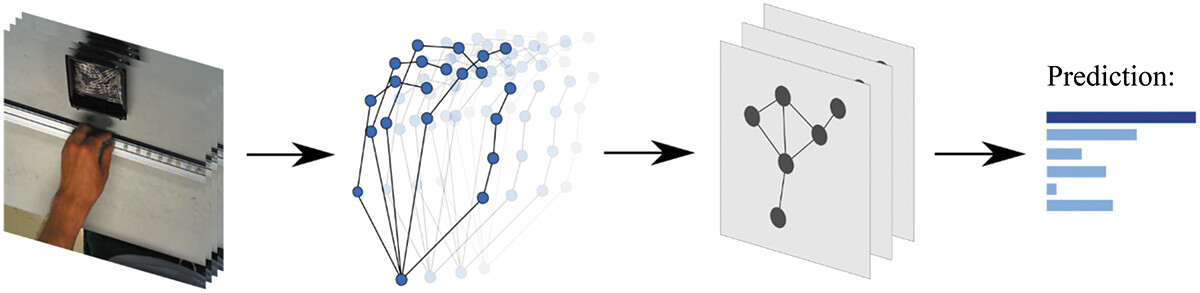

A dataset of Methods-Time Measurement-1 (MTM-1) motions, signalled as consecutive video frames of 21 3D hand keypoints, acquired via MediaPipe Hands from RGB-Video material. Vertices are the finger joints of the human hand and edges are the bones connecting them. The targets are manually labeled for each frame, according to one of the five MTM-1 motions (classes
): Grasp, Release, Move, Reach, Position plus a negative class for frames without graph signals (no hand present). This is a classification task where
 consecutive frames need to be assigned to the corresponding class
. The data x is returned in shape (3, 21, T), the target is returned one-hot-encoded in shape (T, 6).

[lWikipedia of the Methods-time measurement system](https://en.wikipedia.org/wiki/Methods-time_measurement)

In [10]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal
def load_dataset_custom(Loader_function, n_frames):
  loader = Loader_name()
  for i, data in enumerate(dataset):
    feature = dataset_nonpermute[i].x
    data.x = copy.copy(feature.permute(1, 0, 2))
  return dataset

### Fisrt, we load frame by frame.

In [11]:
from torch_geometric_temporal.dataset import MTMDatasetLoader
from torch_geometric_temporal.signal import StaticGraphTemporalSignal
import torch
# Load original dataset
loader = MTMDatasetLoader()
dataset = loader.get_dataset(frames = 1)

# Extract components of the temporal dataset
# These are lists (or iterables) over time
edge_index = dataset.edge_index
edge_weight = dataset.edge_weight
features = dataset.features
targets = dataset.targets

# Transpose the feature tensors and convert to float
# Each feature tensor originally has shape (3, 21, 1)
# We want to make it (21, 3, 1) and ensure it's float
new_features = [torch.from_numpy(x).permute(1, 0, 2).float() for x in features]

# Create a new StaticGraphTemporalSignal with the modified features
new_dataset = StaticGraphTemporalSignal(
    edge_index=edge_index,
    edge_weight=edge_weight,
    features=new_features,
    targets=targets
)

In [15]:
new_dataset[190].edge_index

tensor([[ 0,  0,  0,  0,  1,  2,  3,  6,  6,  7,  9, 10, 11, 13, 14, 15, 17, 18,
         19],
        [ 1,  5,  9, 17,  2,  3,  4,  5,  7,  8, 10, 11, 12, 14, 15, 16, 18, 19,
         20]])

In [59]:
from torch_geometric_temporal.dataset import MTMDatasetLoader
import copy
loader = MTMDatasetLoader()
dataset_nonpermute = loader.get_dataset(frames = 1)
# Originally, the shape of the x object in each data in this dataset est (3,21,frames)
# we would like to change it into (21,3, frames) to represent the 21 nodes,
# each one has a (3 x frames)-dim feature
dataset = copy.copy(dataset_nonpermute)
for i, _ in enumerate(dataset):
  feature = dataset_nonpermute[i].x
  dataset[i].x = feature.permute(1, 0, 2)
print(f'Dataset: {dataset}:')

Dataset: <torch_geometric_temporal.signal.static_graph_temporal_signal.StaticGraphTemporalSignal object at 0x7c7c8c12ff50>:


In [14]:
for i, data in enumerate(new_dataset):
  print(f"The {i}th graph in the dataset is: {data}")

Streaming output truncated to the last 5000 lines.
The 9453th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9454th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9455th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9456th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9457th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9458th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9459th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9460th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9461th graph in the dataset is: Data(x=[21, 3, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
The 9462th graph in th

Now, let 's try to study one sample in our dataset (which is a graph object)


In [16]:
data = dataset[190]  # Get a graph object

print()
print(data)
print('=============================================================')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')


Data(x=[3, 21, 16], edge_index=[2, 19], edge_attr=[19], y=[16, 6])
Number of edges: 19
Average node degree: 6.33


In [18]:
data.y

tensor([[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]])

In [50]:
type(data)

torch_geometric.data.data.Data

In this graph, we should have 21 nodes, each has a (3*frames) features.
However, due to the structure of this dataset, there seems to be an error.
Normally, the following command returns the number of node.  it returns 3 which is the dimension of the feature of each node.


In [46]:
(data.x.permute(1,0,2)).shape

torch.Size([21, 3, 1])

In [15]:
data.edge_index

tensor([[ 0,  0,  0,  0,  1,  2,  3,  6,  6,  7,  9, 10, 11, 13, 14, 15, 17, 18,
         19],
        [ 1,  5,  9, 17,  2,  3,  4,  5,  7,  8, 10, 11, 12, 14, 15, 16, 18, 19,
         20]])

This dataset provides **188 different graphs**, and the task is to classify each graph into **one out of two classes**.

By inspecting the first graph object of the dataset, we can see that it comes with **17 nodes (with 7-dimensional feature vectors)** and **38 edges** (leading to an average node degree of 2.24).
It also comes with exactly **one graph label** (`y=[1]`), and, in addition to previous datasets, provides addtional **4-dimensional edge features** (`edge_attr=[38, 4]`).
However, for the sake of simplicity, we will not make use of those.

PyTorch Geometric provides some useful utilities for working with graph datasets, *e.g.*, we can shuffle the dataset and use the first 150 graphs as training graphs, while using the remaining ones for testing:

*Quan's note: In the cell above, we print out the information of the first graph in the dataset. You can print out info of other graphs to see that they do not necessarily have the same size and structures.*

In [ ]:
torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38


*Quan's note: The section below is a common technique to accelarate the training process (combining different datapoints and process all in one go). Please understand that, theoretically, you can train our GNN without this batching step, but it will be slower.*

## Mini-batching of graphs

Since graphs in graph classification datasets are usually small, a good idea is to **batch the graphs** before inputting them into a Graph Neural Network to guarantee full GPU utilization.
In the image or language domain, this procedure is typically achieved by **rescaling** or **padding** each example into a set of equally-sized shapes, and examples are then grouped in an additional dimension.
The length of this dimension is then equal to the number of examples grouped in a mini-batch and is typically referred to as the `batch_size`.

However, for GNNs the two approaches described above are either not feasible or may result in a lot of unnecessary memory consumption.
Therefore, PyTorch Geometric opts for another approach to achieve parallelization across a number of examples. Here, adjacency matrices are stacked in a diagonal fashion (creating a giant graph that holds multiple isolated subgraphs), and node and target features are simply concatenated in the node dimension:

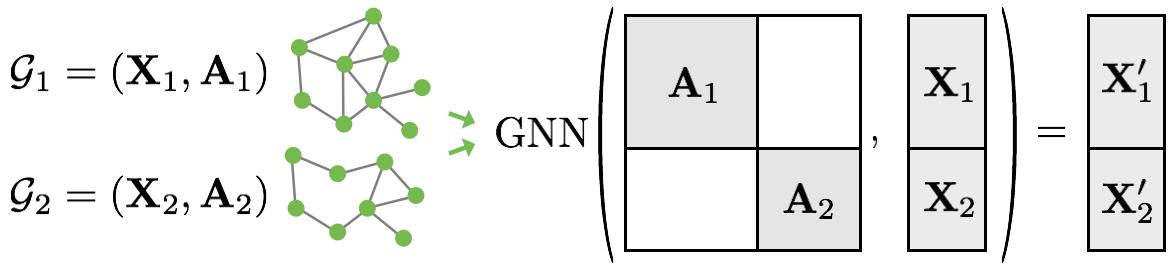

This procedure has some crucial advantages over other batching procedures:

1. GNN operators that rely on a message passing scheme do not need to be modified since messages are not exchanged between two nodes that belong to different graphs.

2. There is no computational or memory overhead since adjacency matrices are saved in a sparse fashion holding only non-zero entries, *i.e.*, the edges.

PyTorch Geometric automatically takes care of **batching multiple graphs into a single giant graph** with the help of the [`torch_geometric.data.DataLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.DataLoader) class:

In [ ]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2636], x=[1188, 7], edge_attr=[2636, 4], y=[64], batch=[1188], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2506], x=[1139, 7], edge_attr=[2506, 4], y=[64], batch=[1139], ptr=[65])

Step 3:
Number of graphs in the current batch: 22
DataBatch(edge_index=[2, 852], x=[387, 7], edge_attr=[852, 4], y=[22], batch=[387], ptr=[23])

